<a href="https://colab.research.google.com/github/yuione51/sample/blob/main/experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

experience = pd.read_csv('체험회원.csv', low_memory=False)

In [99]:
experience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6130 entries, 0 to 6129
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구분        6130 non-null   object
 1   체험여부      6130 non-null   object
 2   결제여부      6130 non-null   object
 3   학생명       6130 non-null   object
 4   학생아이디     6130 non-null   object
 5   지부명       6128 non-null   object
 6   파트명       6128 non-null   object
 7   관리교사명     6130 non-null   object
 8   상품명       6130 non-null   object
 9   학습시작일     6130 non-null   object
 10  학습마감일     6130 non-null   object
 11  학부모성함     6130 non-null   object
 12  학부모아이디    6130 non-null   object
 13  학부모핸드폰번호  6130 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 670.6+ KB


In [100]:
# 결측값 확인
print("\nMissing Values:")
print(experience.isnull().sum())


Missing Values:
구분          0
체험여부        0
결제여부        0
학생명         0
학생아이디       0
지부명         2
파트명         2
관리교사명       0
상품명         0
학습시작일       0
학습마감일       0
학부모성함       0
학부모아이디      0
학부모핸드폰번호    0
dtype: int64


In [101]:
# 결측치 처리 - 'Unknown'으로 대체
experience['지부명'].fillna('Unknown', inplace=True)
experience['파트명'].fillna('Unknown', inplace=True)
experience['관리교사명'].fillna('Unknown', inplace=True)

In [102]:
# 결측값 확인
print("\nMissing Values:")
print(experience.isnull().sum())


Missing Values:
구분          0
체험여부        0
결제여부        0
학생명         0
학생아이디       0
지부명         0
파트명         0
관리교사명       0
상품명         0
학습시작일       0
학습마감일       0
학부모성함       0
학부모아이디      0
학부모핸드폰번호    0
dtype: int64


In [103]:
# 날짜 형식 변환
experience['학습시작일'] = pd.to_datetime(experience['학습시작일'], errors='coerce')
experience['학습마감일'] = pd.to_datetime(experience['학습마감일'], errors='coerce')

In [104]:
# 중복 데이터 확인 및 제거
print("\nDuplicate Rows:", experience.duplicated().sum())
experience = experience.drop_duplicates()


Duplicate Rows: 0


In [105]:
# 불필요한 컬럼 제거
columns_to_drop = ['학생명', '학생아이디', '학부모성함', '학부모아이디']
experience = experience.drop(columns=columns_to_drop)

In [106]:
# 데이터 전처리 결과 확인
print("\nCleaned Data Information:")
print(experience.info())
print(experience.head())


Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6130 entries, 0 to 6129
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   구분        6130 non-null   object        
 1   체험여부      6130 non-null   object        
 2   결제여부      6130 non-null   object        
 3   지부명       6130 non-null   object        
 4   파트명       6130 non-null   object        
 5   관리교사명     6130 non-null   object        
 6   상품명       6130 non-null   object        
 7   학습시작일     6130 non-null   datetime64[ns]
 8   학습마감일     6130 non-null   datetime64[ns]
 9   학부모핸드폰번호  6130 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 479.0+ KB
None
     구분  체험여부 결제여부    지부명    파트명    관리교사명                              상품명  \
0  초등지인  체험진행  미결제    1지부  박경미 팀      한영화  [초등][Z]소개이벤트(관리교사)(뉴)(랜딩)_10일_R   
1  초등지인  체험진행   결제    3지부  나유덕 팀      김정현      [초등][Z]소개이벤트(관리교사)(뉴)_10일_R   
2  초

In [107]:
# 데이터의 기본 통계 정보 확인
print(experience.describe(include='all'))

          구분  체험여부  결제여부   지부명    파트명     관리교사명                           상품명  \
count   6130  6130  6130  6130   6130      6130                          6130   
unique     5     2     2    12     87      1074                            29   
top     초등지인  체험진행    결제   1지부  이혜영 팀  김지연(148)  [초등][AI]소개이벤트(관리교사)(뉴)_14일_R   
freq    3855  5952  3074  2165    272        70                          1372   
mean     NaN   NaN   NaN   NaN    NaN       NaN                           NaN   
min      NaN   NaN   NaN   NaN    NaN       NaN                           NaN   
25%      NaN   NaN   NaN   NaN    NaN       NaN                           NaN   
50%      NaN   NaN   NaN   NaN    NaN       NaN                           NaN   
75%      NaN   NaN   NaN   NaN    NaN       NaN                           NaN   
max      NaN   NaN   NaN   NaN    NaN       NaN                           NaN   
std      NaN   NaN   NaN   NaN    NaN       NaN                           NaN   

                           

In [108]:
import matplotlib.font_manager as fm
plt.rcParams['figure.dpi'] = 100

# 폰트 경로 설정
font_path = '/content/malgun.ttf'

# 폰트 매니저에 폰트 추가
fm.fontManager.addfont(font_path)
plt.rc('font', family='Malgun Gothic')

plt.rcParams['font.family']


['Malgun Gothic']

In [109]:
plt.rc('font', family = 'Malgun Gothic')

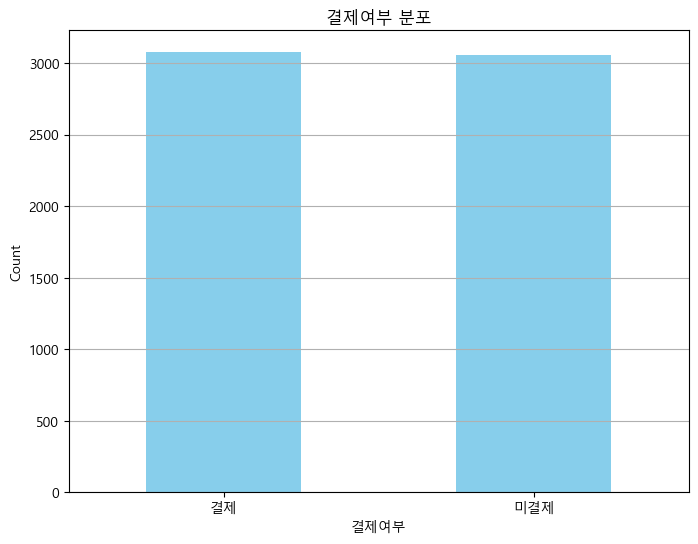

In [110]:
# 결제 여부 분포 시각화
payment_status_counts = experience['결제여부'].value_counts()
plt.figure(figsize=(8, 6))
payment_status_counts.plot(kind='bar', color='skyblue')
plt.title('결제여부 분포')
plt.xlabel('결제여부')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

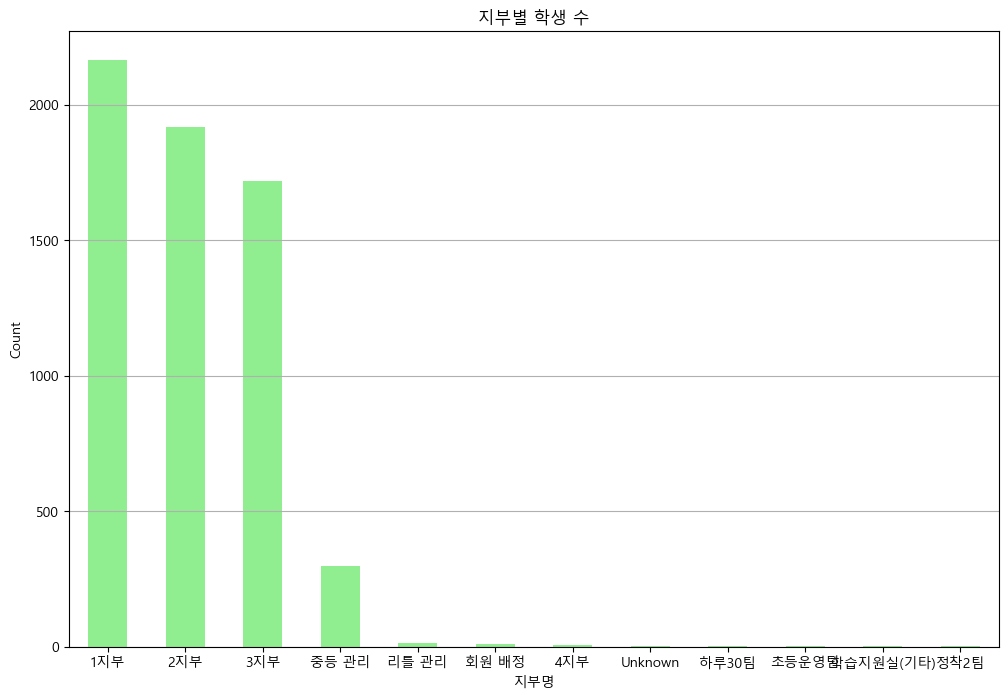

In [111]:
# 지부별 학생 수 확인 및 시각화
branch_counts = experience['지부명'].value_counts()
plt.figure(figsize=(12, 8))
branch_counts.plot(kind='bar', color='lightgreen')
plt.title('지부별 학생 수')
plt.xlabel('지부명')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

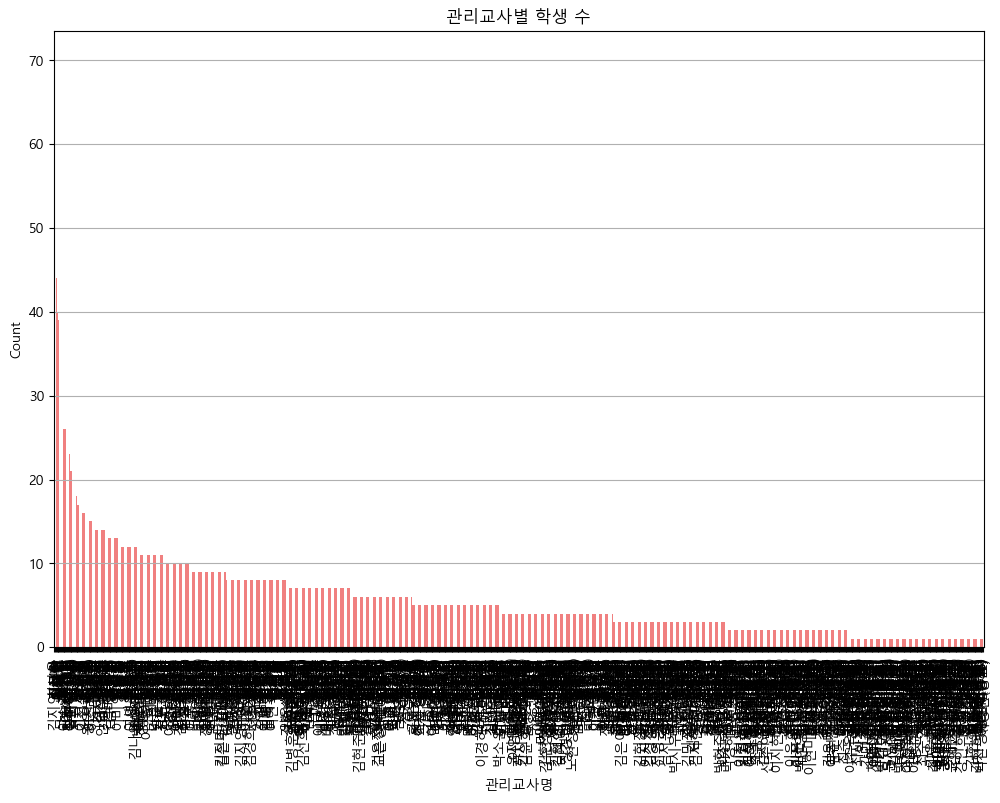

In [112]:
# 관리교사별 학생 수 확인 및 시각화
teacher_counts = experience['관리교사명'].value_counts()
plt.figure(figsize=(12, 8))
teacher_counts.plot(kind='bar', color='lightcoral')
plt.title('관리교사별 학생 수')
plt.xlabel('관리교사명')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

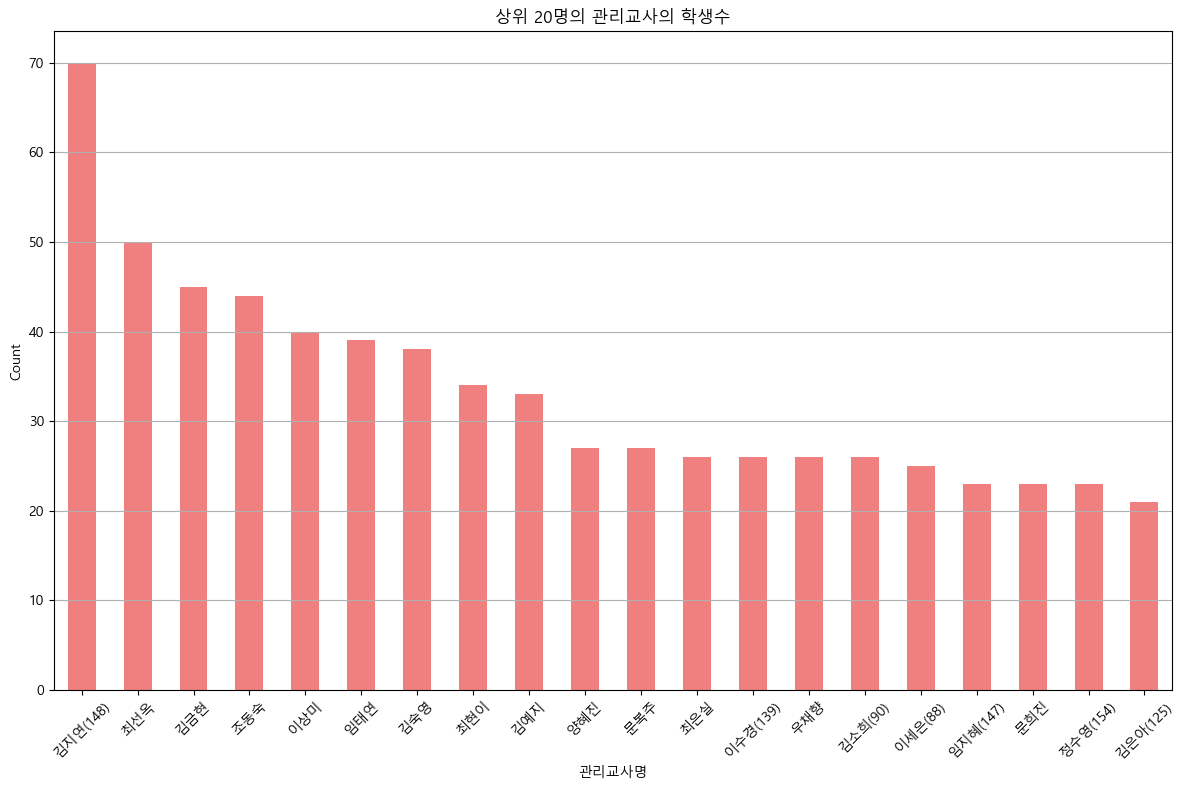

In [113]:
# 상위 20명의 관리교사만 표시
top_20_teachers = experience['관리교사명'].value_counts().head(20)

plt.figure(figsize=(12, 8))
top_20_teachers.plot(kind='bar', color='lightcoral')
plt.title('상위 20명의 관리교사의 학생수')
plt.xlabel('관리교사명')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

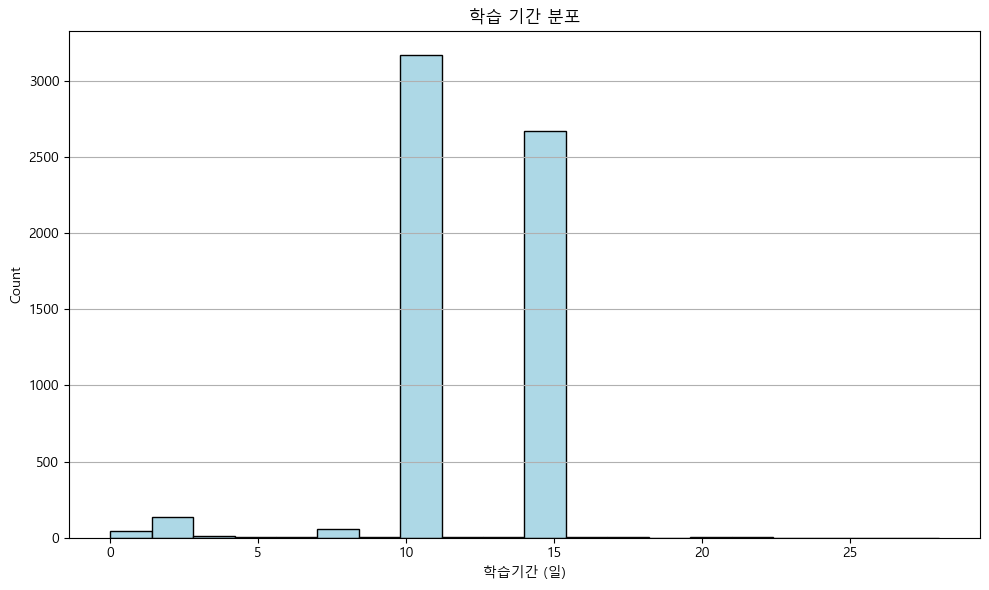

In [114]:
# 학습 기간 계산 및 분포 확인
experience['학습기간'] = (experience['학습마감일'] - experience['학습시작일']).dt.days
plt.figure(figsize=(10, 6))
plt.hist(experience['학습기간'].dropna(), bins=20, color='lightblue', edgecolor='black')
plt.title('학습 기간 분포')
plt.xlabel('학습기간 (일)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [115]:
import scipy.stats as stats

# 지부별 결제 여부 교차표 생성
cross_tab = pd.crosstab(experience['지부명'], experience['결제여부'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 결과 출력
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 가설 검정 결과 해석
alpha = 0.05
if p < alpha:
    print("귀무가설(H0)을 기각합니다. 지부에 따라 무료 체험 학습을 진행한 학생들의 결제 비율에는 차이가 있습니다.")
else:
    print("귀무가설(H0)을 기각하지 못합니다. 지부에 따라 무료 체험 학습을 진행한 학생들의 결제 비율에는 차이가 없습니다.")

Chi2: 54.766033681321126
P-value: 8.552638595354987e-08
Degrees of Freedom: 11
Expected Frequencies:
[[1.08567863e+03 1.07932137e+03]
 [9.60813051e+02 9.55186949e+02]
 [8.61522349e+02 8.56477651e+02]
 [2.00587276e+00 1.99412724e+00]
 [1.00293638e+00 9.97063622e-01]
 [6.51908646e+00 6.48091354e+00]
 [5.01468189e-01 4.98531811e-01]
 [1.49938989e+02 1.49061011e+02]
 [5.01468189e-01 4.98531811e-01]
 [5.01468189e-01 4.98531811e-01]
 [5.01468189e-01 4.98531811e-01]
 [4.51321370e+00 4.48678630e+00]]
귀무가설(H0)을 기각합니다. 지부에 따라 무료 체험 학습을 진행한 학생들의 결제 비율에는 차이가 있습니다.


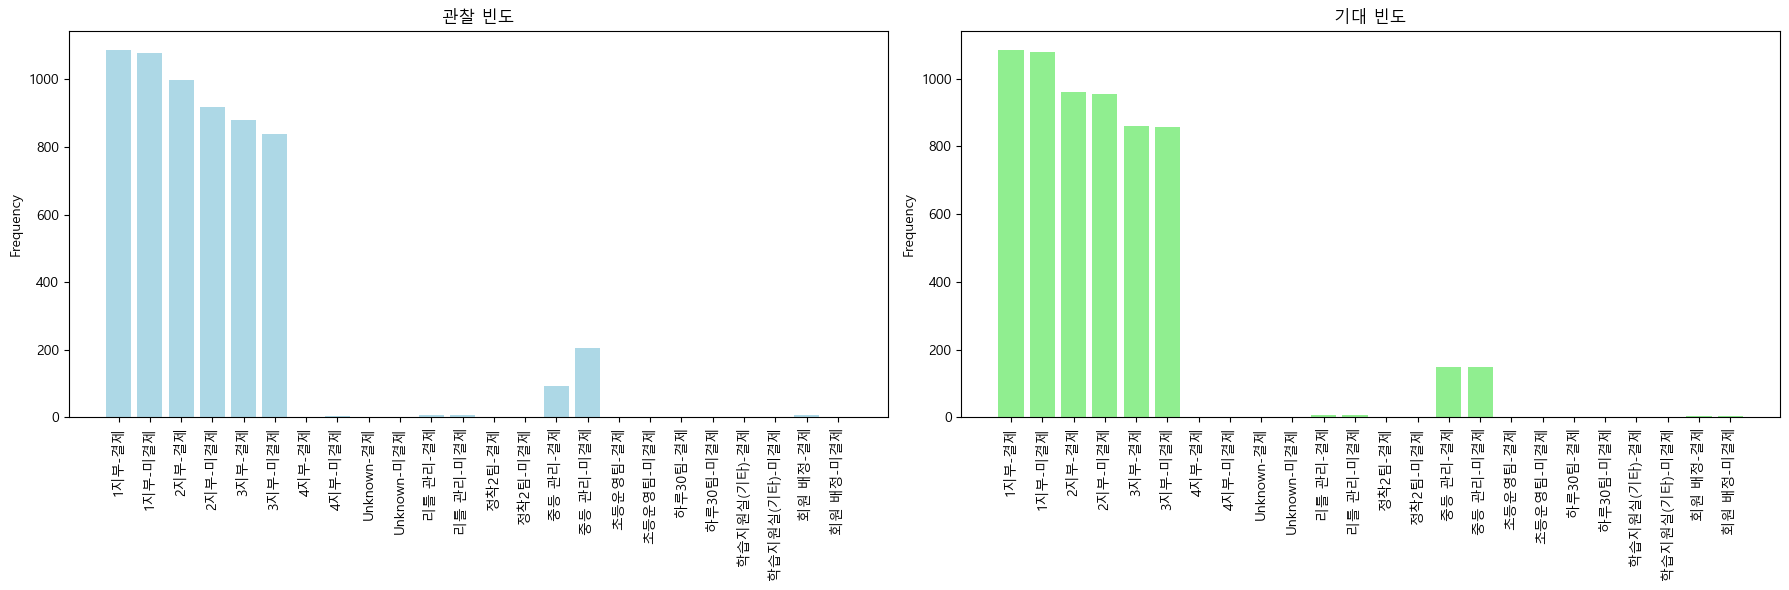

In [116]:
import numpy as np

# 카이제곱 검정 결과 시각화
observed = cross_tab.values
expected = np.array(expected)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 실제 빈도 시각화
axes[0].bar(range(len(observed.flatten())), observed.flatten(), color='lightblue')
axes[0].set_title('관찰 빈도')
axes[0].set_xticks(range(len(observed.flatten())))
axes[0].set_xticklabels([f'{i}-{j}' for i in cross_tab.index for j in cross_tab.columns], rotation=90)
axes[0].set_ylabel('Frequency')

# 기대 빈도 시각화
axes[1].bar(range(len(expected.flatten())), expected.flatten(), color='lightgreen')
axes[1].set_title('기대 빈도')
axes[1].set_xticks(range(len(expected.flatten())))
axes[1].set_xticklabels([f'{i}-{j}' for i in cross_tab.index for j in cross_tab.columns], rotation=90)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [117]:
from datetime import datetime

# 결측치 처리
experience = experience.dropna(subset=['학습시작일'])

# 학습 시작일을 숫자로 변환
experience['학습시작일_숫자'] = (experience['학습시작일'] - experience['학습시작일'].min()).dt.days

# 결제 여부를 숫자로 변환 (결제: 1, 미결제: 0)
experience['결제여부_숫자'] = experience['결제여부'].apply(lambda x: 1 if x == '결제' else 0)

# 결제 여부에 따른 학습 시작일 평균 차이
결제_학습시작일 = experience[experience['결제여부_숫자'] == 1]['학습시작일_숫자']
미결제_학습시작일 = experience[experience['결제여부_숫자'] == 0]['학습시작일_숫자']

# 독립표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(결제_학습시작일, 미결제_학습시작일)

# 결과 출력
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# 가설 검정 결과 해석
alpha = 0.05
if p_value < alpha:
    print("귀무가설(H0)을 기각합니다. 학습 시작일과 결제 여부 간에는 상관관계가 있습니다.")
else:
    print("귀무가설(H0)을 기각하지 못합니다. 학습 시작일과 결제 여부 간에는 상관관계가 없습니다.")

T-Statistic: 10.454392146178638
P-Value: 2.2844208456584684e-25
귀무가설(H0)을 기각합니다. 학습 시작일과 결제 여부 간에는 상관관계가 있습니다.


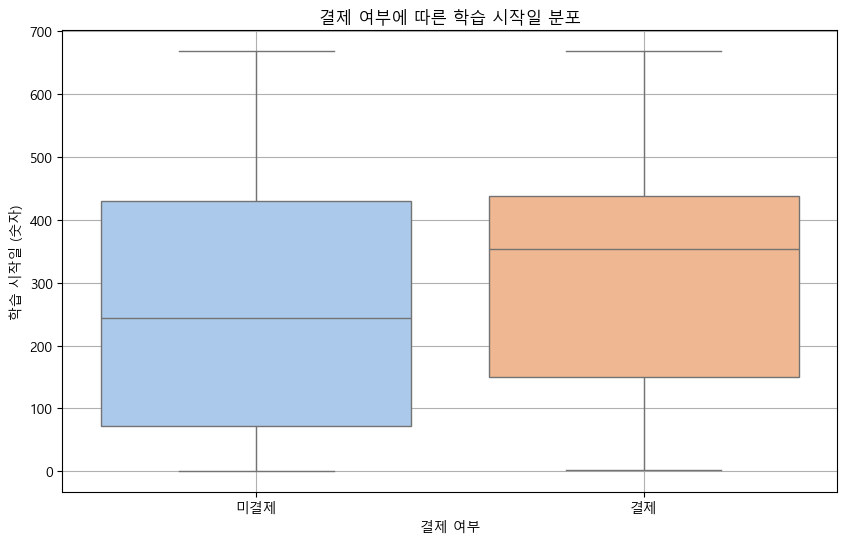

In [118]:
import seaborn as sns

# 학습 시작일에 따른 결제 여부 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='결제여부', y='학습시작일_숫자', hue='결제여부', data=experience, palette='pastel', legend=False)
plt.title('결제 여부에 따른 학습 시작일 분포')
plt.xlabel('결제 여부')
plt.ylabel('학습 시작일 (숫자)')
plt.grid(True)
plt.show()

In [119]:
# 학습 시작일을 월별로 구분
experience['학습시작월'] = experience['학습시작일'].dt.to_period('M')

# 월별 결제 비율 계산
monthly_payment = experience.groupby('학습시작월')['결제여부_숫자'].mean()

# 결과 출력
print(monthly_payment)


학습시작월
2022-01    0.351254
2022-02    0.364629
2022-03    0.456311
2022-04    0.454545
2022-05    0.423077
2022-06    0.484163
2022-07    0.412879
2022-08    0.494898
2022-09    0.535912
2022-10    0.532609
2022-11    0.570175
2022-12    0.636829
2023-01    0.630769
2023-02    0.563193
2023-03    0.481928
2023-04    0.530928
2023-05    0.682796
2023-06    0.710692
2023-07    0.602740
2023-08    0.608696
2023-09    0.399015
2023-10    0.474576
Freq: M, Name: 결제여부_숫자, dtype: float64


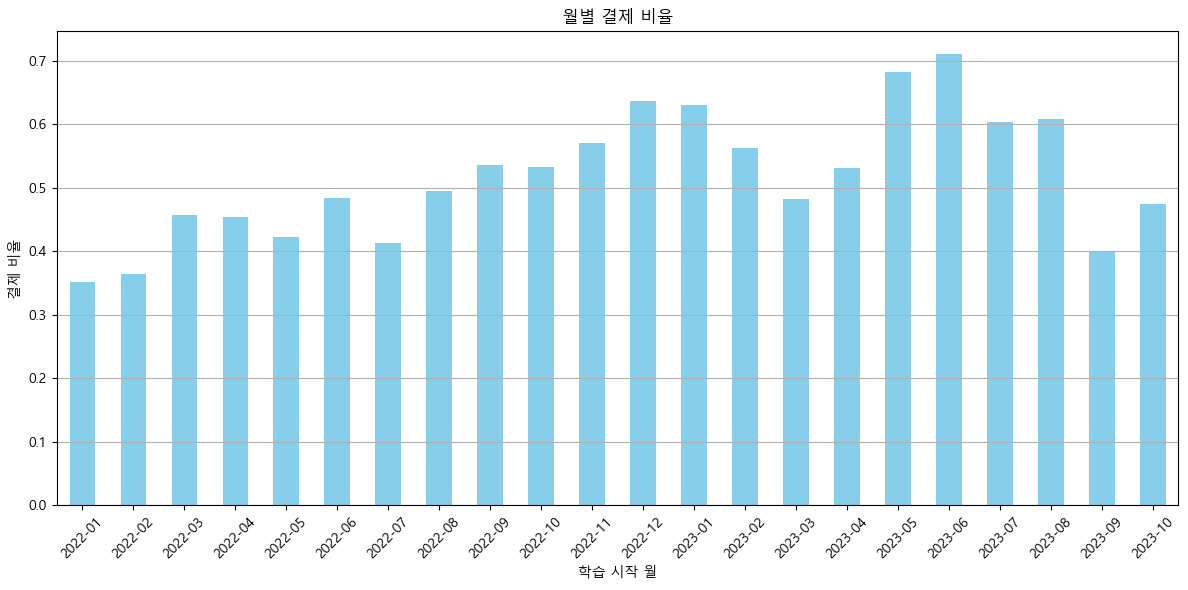

In [120]:
# 월별 결제 비율 시각화
plt.figure(figsize=(12, 6))
monthly_payment.plot(kind='bar', color='skyblue')
plt.title('월별 결제 비율')
plt.xlabel('학습 시작 월')
plt.ylabel('결제 비율')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
# 월별 결제 여부 교차표 생성
cross_tab = pd.crosstab(experience['학습시작월'], experience['결제여부'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 결과 출력
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 가설 검정 결과 해석
alpha = 0.05
if p < alpha:
    print("귀무가설(H0)을 기각합니다. 학습 시작일과 결제 여부 간에는 상관관계가 있습니다.")
else:
    print("귀무가설(H0)을 기각하지 못합니다. 학습 시작일과 결제 여부 간에는 상관관계가 없습니다.")

Chi2: 245.74349779280345
P-value: 2.9347257069882015e-40
Degrees of Freedom: 21
Expected Frequencies:
[[279.81924959 278.18075041]
 [229.67243067 228.32756933]
 [206.60489396 205.39510604]
 [143.41990212 142.58009788]
 [104.30538336 103.69461664]
 [110.82446982 110.17553018]
 [132.38760196 131.61239804]
 [ 98.28776509  97.71223491]
 [ 90.76574225  90.23425775]
 [ 92.27014682  91.72985318]
 [114.33474715 113.66525285]
 [196.07406199 194.92593801]
 [195.5725938  194.4274062 ]
 [226.16215334 224.83784666]
 [291.35301794 289.64698206]
 [ 97.28482871  96.71517129]
 [ 93.2730832   92.7269168 ]
 [ 79.73344209  79.26655791]
 [ 73.21435563  72.78564437]
 [ 57.66884176  57.33115824]
 [101.79804241 101.20195759]
 [ 59.17324633  58.82675367]]
귀무가설(H0)을 기각합니다. 학습 시작일과 결제 여부 간에는 상관관계가 있습니다.


In [122]:
# 학습 마감일을 숫자로 변환
experience['학습마감일_숫자'] = (experience['학습마감일'] - experience['학습마감일'].min()).dt.days

# 결제 여부를 숫자로 변환 (결제: 1, 미결제: 0)
experience['결제여부_숫자'] = experience['결제여부'].apply(lambda x: 1 if x == '결제' else 0)

# 결제 여부에 따른 학습 마감일 평균 차이
결제_학습마감일 = experience[experience['결제여부_숫자'] == 1]['학습마감일_숫자']
미결제_학습마감일 = experience[experience['결제여부_숫자'] == 0]['학습마감일_숫자']

# 독립표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(결제_학습마감일, 미결제_학습마감일)

# 결과 출력
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# 가설 검정 결과 해석
alpha = 0.05
if p_value < alpha:
    print("귀무가설(H0)을 기각합니다. 학습 마감일과 결제 여부 간에는 상관관계가 있습니다.")
else:
    print("귀무가설(H0)을 기각하지 못합니다. 학습 마감일과 결제 여부 간에는 상관관계가 없습니다.")

T-Statistic: 10.28810097531226
P-Value: 1.2635116954493413e-24
귀무가설(H0)을 기각합니다. 학습 마감일과 결제 여부 간에는 상관관계가 있습니다.


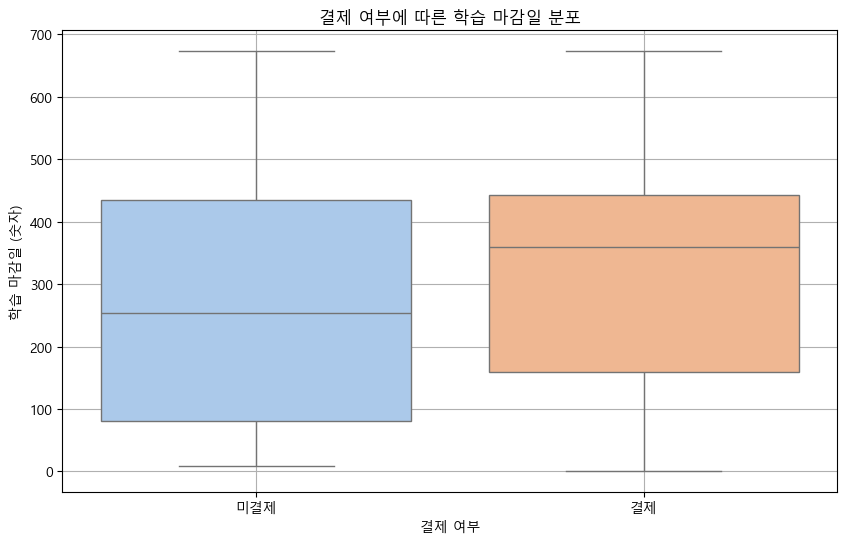

In [123]:
# 학습 마감일에 따른 결제 여부 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='결제여부', y='학습마감일_숫자', hue='결제여부', data=experience, palette='pastel', legend=False)
plt.title('결제 여부에 따른 학습 마감일 분포')
plt.xlabel('결제 여부')
plt.ylabel('학습 마감일 (숫자)')
plt.grid(True)
plt.show()

In [124]:
# 학습 마감일을 월별로 구분
experience['학습마감월'] = experience['학습마감일'].dt.to_period('M')

# 월별 결제 비율 계산
monthly_payment = experience.groupby('학습마감월')['결제여부_숫자'].mean()

# 결과 출력
print(monthly_payment)

학습마감월
2022-01    0.371831
2022-02    0.383028
2022-03    0.388330
2022-04    0.426829
2022-05    0.446367
2022-06    0.435185
2022-07    0.487705
2022-08    0.428571
2022-09    0.538462
2022-10    0.504274
2022-11    0.596939
2022-12    0.607143
2023-01    0.639676
2023-02    0.533854
2023-03    0.508800
2023-04    0.569507
2023-05    0.585227
2023-06    0.721591
2023-07    0.621622
2023-08    0.616071
2023-09    0.443946
2023-10    0.422414
2023-11    0.612903
Freq: M, Name: 결제여부_숫자, dtype: float64


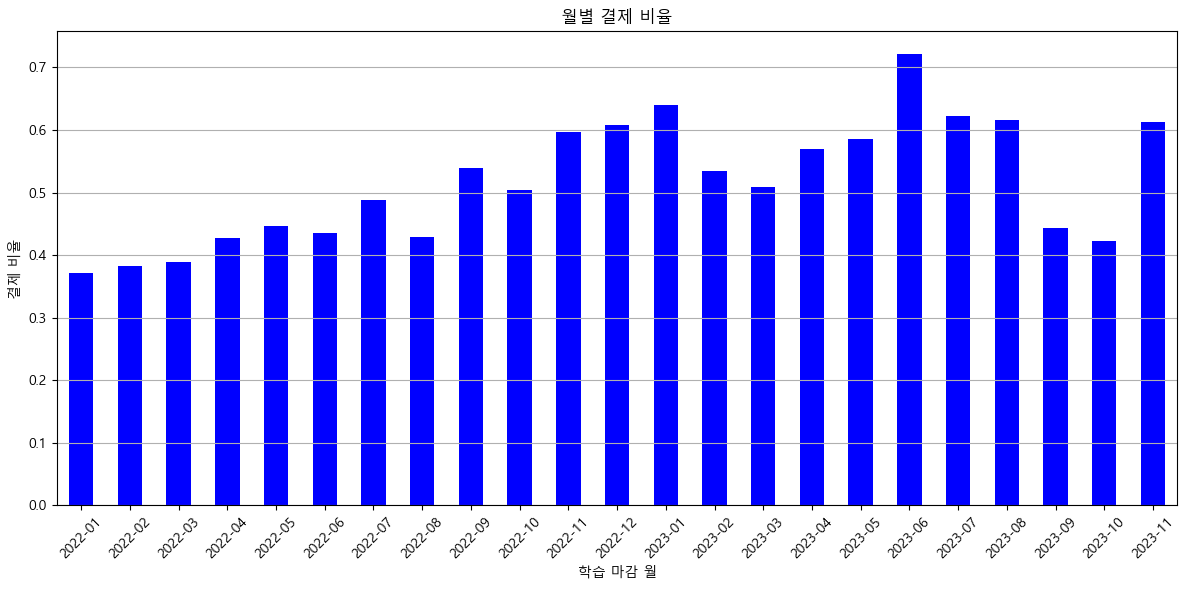

In [125]:
# 월별 결제 비율 시각화
plt.figure(figsize=(12, 6))
monthly_payment.plot(kind='bar', color='blue')
plt.title('월별 결제 비율')
plt.xlabel('학습 마감 월')
plt.ylabel('결제 비율')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [126]:
# 월별 결제 여부 교차표 생성
cross_tab = pd.crosstab(experience['학습마감월'], experience['결제여부'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

# 결과 출력
print(f"Chi2: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 가설 검정 결과 해석
alpha = 0.05
if p < alpha:
    print("귀무가설(H0)을 기각합니다. 학습 마감일과 결제 여부 간에는 상관관계가 있습니다.")
else:
    print("귀무가설(H0)을 기각하지 못합니다. 학습 마감일과 결제 여부 간에는 상관관계가 없습니다.")

Chi2: 218.21478430108283
P-value: 2.9878311996068918e-34
Degrees of Freedom: 22
Expected Frequencies:
[[178.02120718 176.97879282]
 [218.64013051 217.35986949]
 [249.22969005 247.77030995]
 [123.36117455 122.63882545]
 [144.92430669 144.07569331]
 [108.31712887 107.68287113]
 [122.35823817 121.64176183]
 [122.85970636 122.14029364]
 [ 78.22903752  77.77096248]
 [117.34355628 116.65644372]
 [ 98.28776509  97.71223491]
 [154.45220228 153.54779772]
 [247.72528548 246.27471452]
 [192.56378467 191.43621533]
 [313.41761827 311.58238173]
 [111.8274062  111.1725938 ]
 [ 88.25840131  87.74159869]
 [ 88.25840131  87.74159869]
 [ 74.21729201  73.78270799]
 [ 56.16443719  55.83556281]
 [111.8274062  111.1725938 ]
 [ 58.17030995  57.82969005]
 [ 15.54551387  15.45448613]]
귀무가설(H0)을 기각합니다. 학습 마감일과 결제 여부 간에는 상관관계가 있습니다.


In [127]:
# 학습 시작일과 마감일을 요일로 변환
experience['학습시작요일'] = experience['학습시작일'].dt.day_name()
experience['학습마감요일'] = experience['학습마감일'].dt.day_name()

# 결제 여부를 숫자로 변환 (결제: 1, 미결제: 0)
experience['결제여부_숫자'] = experience['결제여부'].apply(lambda x: 1 if x == '결제' else 0)

학습시작요일
Friday       0.493177
Monday       0.497758
Saturday     0.503526
Sunday       0.467577
Thursday     0.511513
Tuesday      0.495366
Wednesday    0.512039
Name: 결제여부_숫자, dtype: float64


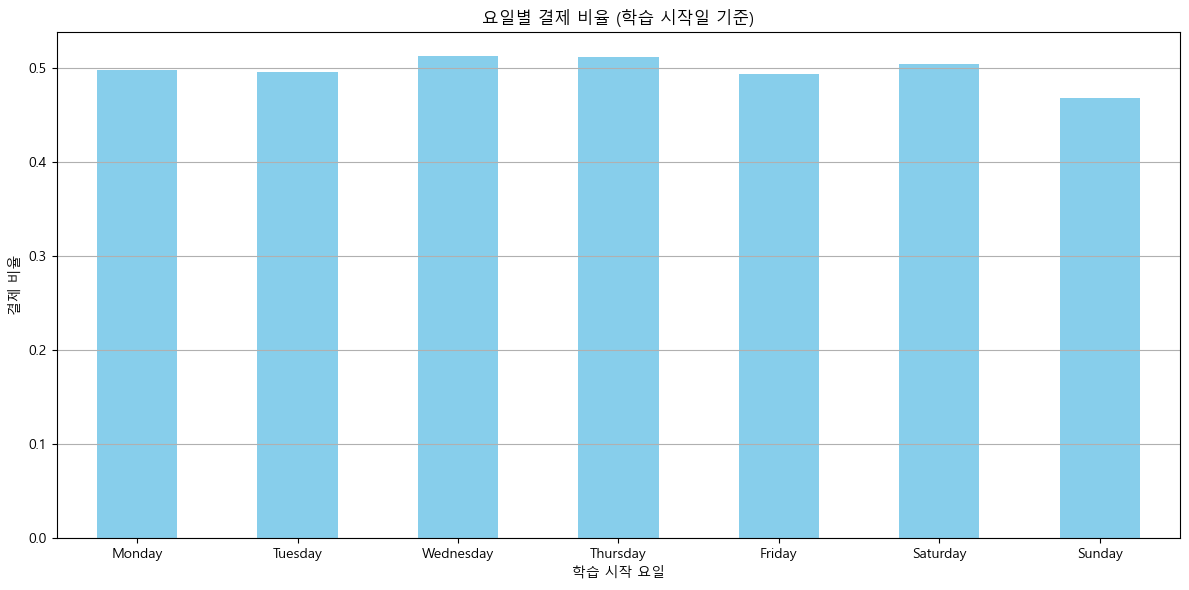

In [128]:
# 요일별 결제 비율 계산 (학습 시작일 기준)
start_day_payment = experience.groupby('학습시작요일')['결제여부_숫자'].mean()

# 결과 출력
print(start_day_payment)

# 요일별 결제 비율 시각화 (학습 시작일 기준)
plt.figure(figsize=(12, 6))
start_day_payment.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='skyblue')
plt.title('요일별 결제 비율 (학습 시작일 기준)')
plt.xlabel('학습 시작 요일')
plt.xticks(rotation=0)
plt.ylabel('결제 비율')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [129]:
# 요일별 결제 여부 교차표 생성 (학습 시작일 기준)
cross_tab_start = pd.crosstab(experience['학습시작요일'], experience['결제여부'])

# 카이제곱 검정 수행 (학습 시작일 기준)
chi2_start, p_start, dof_start, expected_start = stats.chi2_contingency(cross_tab_start)

# 결과 출력
print(f"Chi2: {chi2_start}")
print(f"P-value: {p_start}")
print(f"Degrees of Freedom: {dof_start}")
print("Expected Frequencies:")
print(expected_start)

# 가설 검정 결과 해석 (학습 시작일 기준)
alpha = 0.05
if p_start < alpha:
    print("귀무가설(H0)을 기각합니다. 학습 시작 요일과 결제 여부 간에는 상관관계가 있습니다.")
else:
    print("귀무가설(H0)을 기각하지 못합니다. 학습 시작 요일과 결제 여부 간에는 상관관계가 없습니다.")

Chi2: 2.8694662184885047
P-value: 0.825042895855998
Degrees of Freedom: 6
Expected Frequencies:
[[514.50636215 511.49363785]
 [335.4822186  333.5177814 ]
 [355.54094617 353.45905383]
 [146.93017945 146.06982055]
 [609.78531811 606.21468189]
 [486.92561175 484.07438825]
 [624.82936378 621.17063622]]
귀무가설(H0)을 기각하지 못합니다. 학습 시작 요일과 결제 여부 간에는 상관관계가 없습니다.


학습마감요일
Friday       0.527430
Monday       0.513575
Saturday     0.527835
Sunday       0.549346
Thursday     0.470245
Tuesday      0.458231
Wednesday    0.444138
Name: 결제여부_숫자, dtype: float64


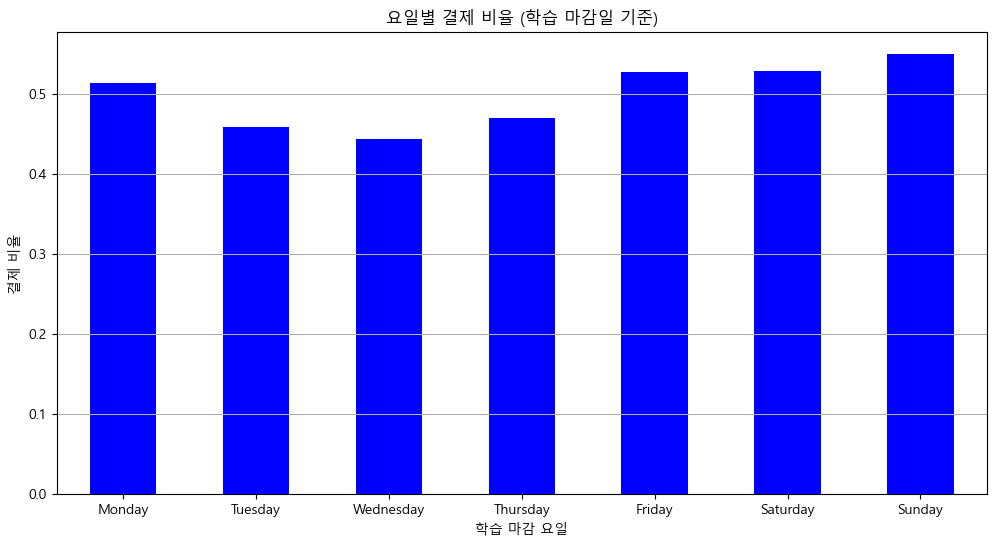

Chi2: 32.688931005883816
P-value: 1.2034330275306938e-05
Degrees of Freedom: 6
Expected Frequencies:
[[521.02544861 517.97455139]
 [443.29787928 440.70212072]
 [486.42414356 483.57585644]
 [421.73474715 419.26525285]
 [429.75823817 427.24176183]
 [408.19510604 405.80489396]
 [363.56443719 361.43556281]]
귀무가설(H0)을 기각합니다. 학습 마감 요일과 결제 여부 간에는 상관관계가 있습니다.


In [130]:
# 요일별 결제 비율 계산 (학습 마감일 기준)
end_day_payment = experience.groupby('학습마감요일')['결제여부_숫자'].mean()

# 결과 출력
print(end_day_payment)

# 요일별 결제 비율 시각화 (학습 마감일 기준)
plt.figure(figsize=(12, 6))
end_day_payment.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='blue')
plt.title('요일별 결제 비율 (학습 마감일 기준)')
plt.xlabel('학습 마감 요일')
plt.ylabel('결제 비율')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# 요일별 결제 여부 교차표 생성 (학습 마감일 기준)
cross_tab_end = pd.crosstab(experience['학습마감요일'], experience['결제여부'])

# 카이제곱 검정 수행 (학습 마감일 기준)
chi2_end, p_end, dof_end, expected_end = stats.chi2_contingency(cross_tab_end)

# 결과 출력
print(f"Chi2: {chi2_end}")
print(f"P-value: {p_end}")
print(f"Degrees of Freedom: {dof_end}")
print("Expected Frequencies:")
print(expected_end)

# 가설 검정 결과 해석 (학습 마감일 기준)
alpha = 0.05
if p_end < alpha:
    print("귀무가설(H0)을 기각합니다. 학습 마감 요일과 결제 여부 간에는 상관관계가 있습니다.")
else:
    print("귀무가설(H0)을 기각하지 못합니다. 학습 마감 요일과 결제 여부 간에는 상관관계가 없습니다.")

In [131]:
# 상위 20명의 관리교사 선택 (체험 프로그램 참여 학생 수 기준)
top_20_teachers = experience['관리교사명'].value_counts().head(20).index
data_top_20 = experience[experience['관리교사명'].isin(top_20_teachers)]

In [132]:
# 상위 20명의 관리교사별 체험건수 및 결제 비율 계산
teacher_experience_count = data_top_20['관리교사명'].value_counts()
teacher_payment_rate = data_top_20.groupby('관리교사명')['결제여부_숫자'].mean()

# 결과 병합
teacher_stats = pd.DataFrame({
    '체험건수': teacher_experience_count,
    '결제비율': teacher_payment_rate
})

# 결과 출력
print(teacher_stats)


          체험건수      결제비율
관리교사명                   
김금현         45  0.333333
김소희(90)     26  0.692308
김숙영         38  0.500000
김예지         33  0.363636
김은아(125)    21  0.666667
김지연(148)    70  0.342857
문복주         27  0.407407
문희진         23  0.391304
양혜진         27  0.555556
우채향         26  0.500000
이상미         40  0.450000
이세은(88)     25  0.320000
이수경(139)    26  0.807692
임지혜(147)    23  0.521739
임태연         39  0.589744
정수영(154)    23  0.521739
조동숙         44  0.340909
최선옥         50  0.600000
최은실         26  0.423077
최현이         34  0.676471


<ipython-input-133-740d1f19f007>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(teacher_stats.index, rotation=45, ha='right')


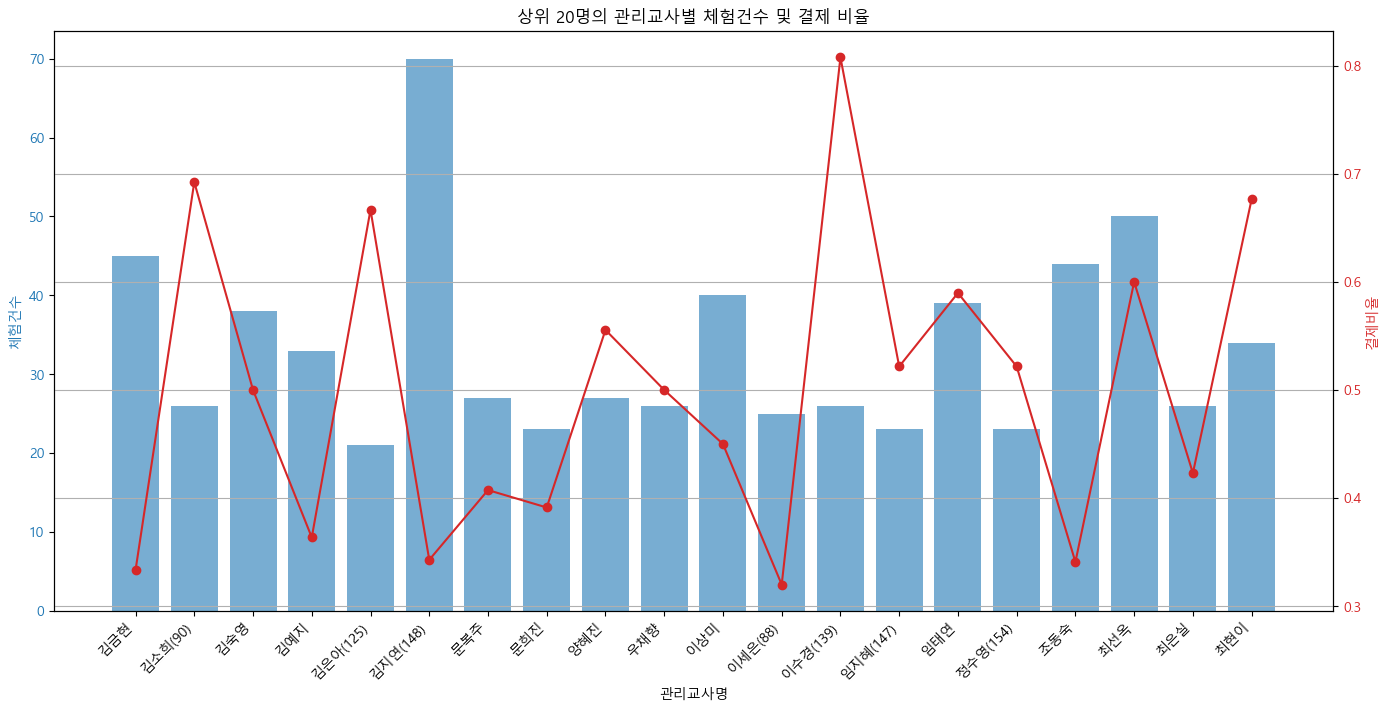

In [133]:
# 상위 20명의 관리교사별 체험건수 및 결제 비율 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('관리교사명')
ax1.set_ylabel('체험건수', color=color)
ax1.bar(teacher_stats.index, teacher_stats['체험건수'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(teacher_stats.index, rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('결제비율', color=color)
ax2.plot(teacher_stats.index, teacher_stats['결제비율'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('상위 20명의 관리교사별 체험건수 및 결제 비율')
plt.grid(axis='y')
plt.show()

In [134]:
# 체험건수와 결제 비율 간의 상관관계 분석
correlation = teacher_stats['체험건수'].corr(teacher_stats['결제비율'])
print(f"체험건수와 결제 비율 간의 상관계수: {correlation}")

체험건수와 결제 비율 간의 상관계수: -0.31471374218291454


In [136]:
# 결제 여부를 숫자로 변환 (결제: 1, 미결제: 0)
experience['결제여부_숫자'] = experience['결제여부'].apply(lambda x: 1 if x == '결제' else 0)

In [137]:
# 관리교사별 체험건수 및 결제 비율 계산
teacher_experience_count = experience['관리교사명'].value_counts()
teacher_payment_rate = experience.groupby('관리교사명')['결제여부_숫자'].mean()

# 결과 병합
teacher_stats = pd.DataFrame({
    '체험건수': teacher_experience_count,
    '결제비율': teacher_payment_rate
})

# 결과 출력
print(teacher_stats)

         체험건수      결제비율
관리교사명                  
(종료)        2  0.500000
감서윤         5  0.600000
감정희         3  0.333333
강가영         2  0.000000
강경민(종료)     2  0.500000
...       ...       ...
황인성         7  0.285714
황지혜         4  0.500000
황혜영         5  0.600000
황희경        10  0.400000
황희숙         3  0.333333

[1074 rows x 2 columns]


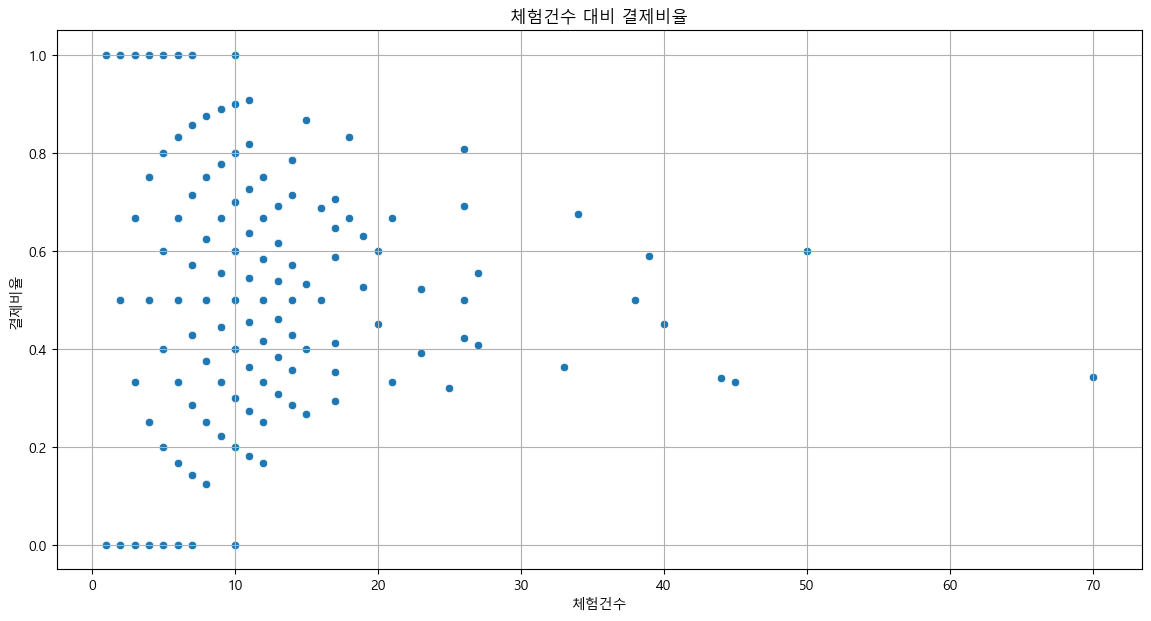

In [138]:
# 체험건수와 결제 비율 시각화
plt.figure(figsize=(14, 7))
sns.scatterplot(x='체험건수', y='결제비율', data=teacher_stats)
plt.title('체험건수 대비 결제비율')
plt.xlabel('체험건수')
plt.ylabel('결제비율')
plt.grid(True)
plt.show()

In [139]:
# 체험건수와 결제 비율 간의 상관관계 분석
correlation = teacher_stats['체험건수'].corr(teacher_stats['결제비율'])
print(f"체험건수와 결제 비율 간의 상관계수: {correlation}")

체험건수와 결제 비율 간의 상관계수: 0.08436769960224853


In [145]:
# 체험건수가 10건 이상 30건 이하이면서 결제 비율이 60% 이상인 관리교사 필터링
selected_teachers = teacher_stats[(teacher_stats['체험건수'] >= 10) & (teacher_stats['체험건수'] <= 30) & (teacher_stats['결제비율'] >= 0.6)]

# 결제 비율이 높은 순으로 정렬
selected_teachers_sorted = selected_teachers.sort_values(by='결제비율', ascending=False)

# 결과 출력
print("체험건수가 10건 이상 30건 이하이면서 결제 비율이 60% 이상인 관리교사 (결제비율 높은 순):")
print(selected_teachers_sorted)

체험건수가 10건 이상 30건 이하이면서 결제 비율이 60% 이상인 관리교사 (결제비율 높은 순):
          체험건수      결제비율
관리교사명                   
박미경(111)    10  1.000000
구민지         11  0.909091
박지유         10  0.900000
이선희(112)    15  0.866667
위은희         18  0.833333
이문희         11  0.818182
이수경(139)    26  0.807692
장명자         10  0.800000
이윤선         10  0.800000
이혜정(149)    10  0.800000
김지영(98)     14  0.785714
김선미(72)     14  0.785714
노현주         14  0.785714
임윤정         12  0.750000
김희자         12  0.750000
김보은         11  0.727273
황연정         11  0.727273
김미란         14  0.714286
박은정         17  0.705882
유난주         10  0.700000
박경진         10  0.700000
장보영(143)    10  0.700000
장원선         10  0.700000
박소연         13  0.692308
김현은         13  0.692308
김은지         13  0.692308
김소희(90)     26  0.692308
명혜정         16  0.687500
김은령         16  0.687500
나승은         16  0.687500
신유미         12  0.666667
박선하         18  0.666667
김은아(125)    21  0.666667
박영미(160)    12  0.666667
이정선(135)    17  0.647059
정현희(종료)     11  0.6